In [1]:
#Importamos la librería requests
import requests

In [2]:
#Definimos la variable url con el sitio web al que haremos scraping
url = 'https://www.pagina12.com.ar/'

In [3]:
#Hacemos un get request a la url (Si está todo ok, debe devolver 200)
p12 = requests.get(url)

In [4]:
#Revisamos el código de respuesta del request efectuado anteriormente
p12.status_code

200

In [5]:
#Imprimimos por pantalla lo que el servidor nos retorna, en este caso un archivo html
print(p12.text)

<!DOCTYPE html><html class="no-js " lang="es"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><

In [6]:
#Usando el método content, nos devuelve lo mismo, pero en binario.
p12.content

b'<!DOCTYPE html><html class="no-js " lang="es"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "P\xc3\xa1gina12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3

In [7]:
#Con el método headers, nos retorna las cabeceras del archivo que nos retorna el servidor
p12.headers

{'Date': 'Sat, 20 Aug 2022 04:39:39 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'vary': 'Accept-Encoding', 'x-dns-prefetch-control': 'off', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'x-etag': 'W/"674b4-RxA+Pkw9KZl3H7Zwqy91NOqQGLI"', 'x-backend': 'frontend', 'x-type': 'Dynamic URI', 'x-backend-ttl': '120.000', 'age': '73', 'grace': '86400.000 none', 'ttl': '46.900', 'x-instance': 'cache-front-prod-varnish-68cf7d4bd6-dfwhj', 'x-restarts': '0', 'x-cache': 'hit cached', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '73d8724969d82889-SCL', 'Content-Encoding': 'br'}

In [8]:
#Con request.headers nos devuelve las cabaceras que nosotros enviamos al servidor al hacer request
p12.request.headers

{'User-Agent': 'python-requests/2.27.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [9]:
#request.method nos retorna el método de consulta que utilizamos. Para este caso, es el método GET
p12.request.method

'GET'

In [10]:
#request.url nos retorna la url a la que estamos consultando
p12.request.url

'https://www.pagina12.com.ar/'

In [11]:
#Importamos la libreria BeautifulSoup
from bs4 import BeautifulSoup

In [12]:
#Transformamos el texto con etiquetas html a un objeto BeautifulSoup, parseandolo con lxml 
s = BeautifulSoup(p12.text, 'lxml')

In [13]:
type(s)

bs4.BeautifulSoup

In [14]:
#Se imprime por pantalla la 'sopa', que vendría siendo la página identada
print(s.prettify())

<!DOCTYPE html>
<html class="no-js" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra 

In [15]:
#Extraemos las secciones del diario
#Usamos el método find en el objeto 's' y definimos la etiqueta está la infomación que se quiere extraer.
#Estos se encuentran en una lista 'ul'. Al indicar los atributos como un diccionario, indicamos la clase
#especifica de la ul que queremos.Finalmente, con el método find_all('li'), lo que hacemos es que nos retorne
#todas las etiquetas li dentro de esta ul, como una lista
secciones = s.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')

In [16]:
secciones

[<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>]

In [17]:
#Con el indicador [0] hacemos que nos retorne el primer elemento de la lista secciones, en este caso, todo 
#lo correspondiente a la sección 'El País'. Guardamos el resultado en la variable 'seccion'
seccion = secciones[0]
print(seccion)

<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>


In [18]:
#Para extraer el link de la sección, primero extremos el tag 'a' de la variable 'seccion'
#Usar section.a equivalente a seccion.find('a')
seccion.a


<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [19]:
#Una vez separado el tag, usamos el método get() para obtener el link como un string
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [20]:
#Para obtener el texto contenido entre los tag 'a' usamos el método get_text()
seccion.a.get_text()

'El país'

In [21]:
#Creamos una lista con los links de cada sección
#El método abreviado para hacerlo es
#link_secciones = [seccion.a.get('href') for seccion in secciones]

link_secciones = []
for seccion in secciones:
    link_secciones.append(seccion.a.get('href'))

In [22]:
link_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [23]:
#Hacemos un request al primer link de nuestra lista link_secciones, en este caso, corresponde a la sección
#El País
sec = requests.get(link_secciones[0])

In [24]:
#Revisamos el código de respuesta del request efectuado anteriormente
sec.status_code

200

In [25]:
#Transformamos el texto con etiquetas html a un objeto BeautifulSoup, parseandolo con lxml 
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [26]:
#Se imprime por pantalla la 'sopa', que vendría siendo la página identada
print(s_seccion.prettify())

<!DOCTYPE html>
<html amp="" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ -->
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página12","isAccessibleForFree": "False","image": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/lo

In [27]:
#Revisamos la estructura html de la sección El País con el Inspector de Elementos del navegador
#Podemos ver que está compuesta por un artículo principal, dos articulos secundarios y un listado de articulos.
#*IMPORTANTE*: La estructura del sitio web puede cambiar con el tiempo, dependiendo de las modificaciones que hagan
#los desarrolladores frontend

ma = s_seccion.find('section', attrs={'class':'top-content'}).find_all('h2')
main_article = [url[0:-1]+ma.find('a').get('href') for ma in ma]
main_article

['https://www.pagina12.com.ar/474837-hablo-la-embajada']

In [28]:
featured_articles = s_seccion.find_all('article', attrs={'class':'article-item--featured'})
featured_article_list = [url[0:-1]+fa.find('h3').find('a').get('href') for fa in featured_articles]
featured_article_list

['https://www.pagina12.com.ar/474859-como-sera-el-puente-al-empleo-la-iniciativa-para-transformar',
 'https://www.pagina12.com.ar/474796-curas-en-la-opcion-por-los-pobres-sin-paz-no-hay-sociedad-po']

In [29]:
regular_articles = s_seccion.find_all('article', attrs={'class':'article-item article-item--teaser'})
regular_articles_list = [url[0:-1]+ra.find('h4').find('a').get('href') for ra in regular_articles]
regular_articles_list

['https://www.pagina12.com.ar/474768-murio-gregorio-dupont-testigo-del-caso-holmberg',
 'https://www.pagina12.com.ar/474780-para-que-sirve-contar-la-historia-de-isabelita-la-version-fe',
 'https://www.pagina12.com.ar/474824-aquella-casa-los-padres-miguel-y-los-recuerdos-antes-de-la-m',
 'https://www.pagina12.com.ar/474833-juicio-por-la-obra-publica-el-lawfare-no-existe-segun-los-fi',
 'https://www.pagina12.com.ar/474839-gabriela-cerruti-curzo-a-marc-stanley-es-muy-facil-opinar-de',
 'https://www.pagina12.com.ar/474857-alberto-fernandez-encabezo-el-tercer-encuentro-del-consejo-f',
 'https://www.pagina12.com.ar/474878-juicio-contra-cristina-kirchner-una-clase-magistral-de-lawfa',
 'https://www.pagina12.com.ar/474888-trelew-a-50-anos-de-una-masacre-que-abrio-las-puertas-del-te']

In [30]:
#Reto Platzi
#Definir una funcion que devuelva todos los links de las noticias de una sección
def get_links_noticias(seccion):

    main_article = seccion.find('section', attrs={'class':'top-content'}).find_all('h2')
    #Se usa url[0:-1] para quitar el último caracter de la url guardada anteriormente (https://www.pagina12.com.ar/)
    #y se concatena con el link de la noticia que está en forma relativa.
    main_article_list = [url[0:-1]+ma.find('a').get('href') for ma in main_article]

    featured_articles = seccion.find_all('article', attrs={'class':'article-item--featured'})
    featured_article_list = [url[0:-1]+fa.find('h3').find('a').get('href') for fa in featured_articles]

    regular_articles = seccion.find_all('article', attrs={'class':'article-item article-item--teaser'})
    regular_articles_list = [url[0:-1]+ra.find('h4').find('a').get('href') for ra in regular_articles]

    links = main_article_list + featured_article_list + regular_articles_list

    return links
    
#En la lista de los link de secciones deportes corresponde a la posicion 4
seccion_deportes = BeautifulSoup(requests.get(link_secciones[4]).text, 'lxml')
links = get_links_noticias(seccion_deportes)
links

['https://www.pagina12.com.ar/474708-ganen-o-caminan-en-lanus-amenazaron-con-quemar-los-autos-de-',
 'https://www.pagina12.com.ar/474166-quien-dijo-que-la-hache-es-muda',
 'https://www.pagina12.com.ar/474734-la-liga-profesional-no-avanzo-con-el-nuevo-formato-y-por-aho',
 'https://www.pagina12.com.ar/474782-moto-gp-el-frances-zarco-hizo-el-mejor-tiempo-en-austria',
 'https://www.pagina12.com.ar/474788-bessone-llego-a-las-80-victorias-en-el-automovilismo-argenti',
 'https://www.pagina12.com.ar/474834-el-equipo-de-la-redencion-de-eeuu-tendra-su-documental-en-ne',
 'https://www.pagina12.com.ar/474844-ricardo-zielinski-presento-la-renuncia-y-estudiantes-no-la-a',
 'https://www.pagina12.com.ar/474712-san-lorenzo-ratifico-que-tendra-elecciones-el-17-de-diciembr',
 'https://www.pagina12.com.ar/474762-para-que-partidos-del-mundial-qatar-2022-se-pidieron-mas-ent']

## Manejo de Excepciones

In [31]:
#Haremos la prueba de manejo de excepciones de forma práctica con una url que no funciona

url_mala = url.replace('2','3')
url_mala

'https://www.pagina13.com.ar/'

In [32]:
#La salida nos dará un error y como el scraper compila por línea, al encontrar un error se detendrá completamente.
requests.get(url_mala).status_code

ConnectionError: HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc2c43dab20>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [33]:
#Para evitar lo anterior, utilizamos el bloque try except
try:
    requests.get(url_mala)
except Exception as e:
    print('error en request')
    print('\n')
    print(e)
    print('\n')

error en request


HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc2c449cbb0>: Failed to establish a new connection: [Errno -2] Name or service not known'))




In [34]:
#De igual manera, si alguna otra linea tiene un problema, se puede saltar
#p.e cambiamos una linea anterior y dejamos el typo find_alf en vez de find_all.
#Esto genera el siguiente error

regular_articles = seccion.find_alf('article', attrs={'class':'article-item article-item--teaser'})


TypeError: 'NoneType' object is not callable

In [35]:
#Aplicando try except podemos saltarnos este error
try:
    regular_articles = seccion.find_all('artico', attrs={'class':'article-item article-item--teaser'})
except:
    pass
print('se continuó ejecutando y no pescó el error anterior')

se continuó ejecutando y no pescó el error anterior


## Descargando el contenido

In [36]:
#El objetivo es obtener el títular, fecha, bajada, volanta, cuerpo y autor de la noticia
from datetime import datetime
url_nota = links[0]

try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        #Extraer título
        titulo = s_nota.find('h1')
        print(titulo.text)
        print('\n')
        #Extraer fecha
        fecha_str = s_nota.find('time').get('datetime') #Retorna un string de la fecha en formato ISO
        fecha = datetime.fromisoformat(fecha_str).date() #Quita el formato ISO de la fecha y retorna solo la fecha
        print(fecha)
        print('\n')
        #Extraer bajada
        bajada = s_nota.find('h3')
        print(bajada.text)
        print('\n')
        #Extraer volanta
        volanta = s_nota.find('h4')
        print(volanta.text)
        print('\n')
        #Extraer cuerpo
        cuerpo = s_nota.find('div', attrs={'class':'article-main-content article-text'}).find_all('p')
        parrafos = [c.text.strip().replace('\xa0',' ') for c in cuerpo]
        parrafos = [i for i in parrafos if i] #Para remover espacios en blanco
            # otra forma
            # parrafos =[]
            #for c in cuerpos:
            # parrafos.append(c.text.strip().replace('\xa0',''))
        print(parrafos)
        print('\n')
        #Extraer Autor
        autor = s_nota.find('div', attrs={'class':'author-name'})
        print(autor.text.replace('Por ',''))
        print('\n')
        
        
except Exception as e:
    print("Error:")
    print(e)
    print("\n")

"Ganen o caminan": en Lanús amenazaron con quemar los autos de los jugadores


2022-08-20


La violenta advertencia de moda, una alusión al episodio que ocurrió recientemente en Aldosivi. En Avellaneda apuntaron contra Falcioni.


También aparecieron mensajes intimidatorios en Independiente


['No son tiempos calmos los que se viven en Independiente y Lanús por estos días. Inmersos en malos presentes futbolísticos, este viernes por la mañana aparecieron pasacalles amenazantes en las cercanías de uno y otro club.', '"Ganen o caminan", rezaba uno de los pasacalles que se colgó en las adyacencias de la Fortaleza, acompañada por la prolija imagen de una llama de fuego y un automóvil, en alusión a la quema de vehículos de los futbolistas. Se ve que lo sucedido en Aldosivi y en Atlético de Rafaela marcó tendencia...', 'La pancarta tiene referencia directa con los hechos violentos de la semana pasada en Mar del Plata, donde barras del club Aldosivi ingresaron al predio y quemaron cinco vehícu

In [37]:
#El objetivo es obtener el títular, fecha, bajada, volanta, cuerpo y autor de la noticia
from datetime import datetime
url_nota = links[0]

try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        #Extraer título
        titulo = s_nota.find('h1')
        print(titulo.text)
        print('\n')
        #Extraer fecha
        fecha_str = s_nota.find('time').get('datetime') #Retorna un string de la fecha en formato ISO
        fecha = datetime.fromisoformat(fecha_str).date() #Quita el formato ISO de la fecha y retorna solo la fecha
        print(fecha)
        print('\n')
        #Extraer bajada
        bajada = s_nota.find('h3')
        print(bajada.text)
        print('\n')
        #Extraer volanta
        volanta = s_nota.find('h4')
        print(volanta.text)
        print('\n')
        #Extraer cuerpo
        cuerpo = s_nota.find('div', attrs={'class':'article-main-content article-text'}).find_all('p')
        for p in cuerpo:
            print(p.get_text())
            print('\n')
        #Extraer Autor
        autor = s_nota.find('div', attrs={'class':'author-name'})
        print(autor.text.replace('Por ',''))
        print('\n')
        
except Exception as e:
    print("Error:")
    print(e)
    print("\n")

"Ganen o caminan": en Lanús amenazaron con quemar los autos de los jugadores


2022-08-20


La violenta advertencia de moda, una alusión al episodio que ocurrió recientemente en Aldosivi. En Avellaneda apuntaron contra Falcioni.


También aparecieron mensajes intimidatorios en Independiente


No son tiempos calmos los que se viven en Independiente y Lanús por estos días. Inmersos en malos presentes futbolísticos, este viernes por la mañana aparecieron pasacalles amenazantes en las cercanías de uno y otro club.


"Ganen o caminan", rezaba uno de los pasacalles que se colgó en las adyacencias de la Fortaleza, acompañada por la prolija imagen de una llama de fuego y un automóvil, en alusión a la quema de vehículos de los futbolistas. Se ve que lo sucedido en Aldosivi y en Atlético de Rafaela marcó tendencia...


La pancarta tiene referencia directa con los hechos violentos de la semana pasada en Mar del Plata, donde barras del club Aldosivi ingresaron al predio y quemaron cinco vehículos 

In [38]:
media = s_nota.find('figure', attrs={'class':'object-fit-block--contain intrinsic-container intrinsic-container-3x2'})

In [39]:
imagenes = media.find_all('img')
imagenes

[<img alt="Uno de los pasacalles que aparecieron cerca del estadio de Lanús (Fuente: NA)" class="" src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2022-08/615915-1660922707220819508_0.jpg?itok=6dvWCoAr"/>]

In [40]:
if len(imagenes) == 0:
    print('no hay imagenes')
else:
    imagen = imagenes[-1].get('src')
    print(imagen)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2022-08/615915-1660922707220819508_0.jpg?itok=6dvWCoAr


In [41]:
img_request = requests.get(imagen)

In [42]:
img_request.status_code

200

In [43]:
from IPython.display import Image

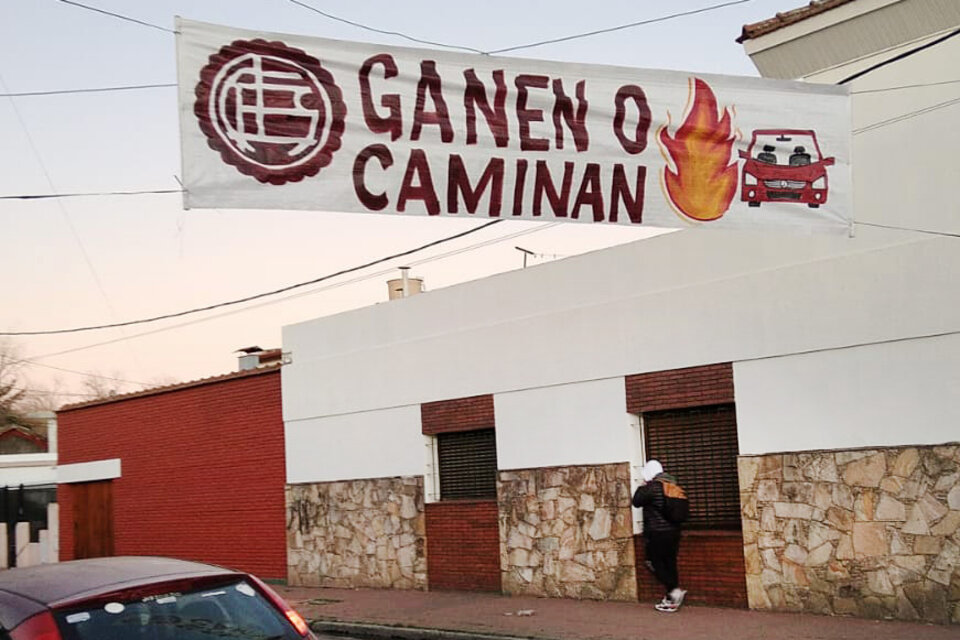

In [44]:
Image(img_request.content)

# Juntando todos lo anterior en una sola función

In [63]:
#Importar librerias a utilizar
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from IPython.display import Image

#Definimos la url principal
url = 'https://www.pagina12.com.ar/'

#Definir un objeto de la clase Response, el cual nos retorna el código de respuesta al hacer request a la url
p12 = requests.get(url)

try:
    if p12.status_code == 200:
        #Transformamos el texto con etiquetas html a un objeto BeautifulSoup, parseandolo con lxml 
        s = BeautifulSoup(p12.text, 'lxml')
        #Extraemos las secciones del diario
        #Usamos el método find en el objeto 's' y definimos la etiqueta está la infomación que se quiere extraer.
        #Estos se encuentran en una lista 'ul'. Al indicar los atributos como un diccionario, indicamos la clase
        #especifica de la ul que queremos.Finalmente, con el método find_all('li'), lo que hacemos es que nos retorne
        #todas las etiquetas li dentro de esta ul, como una lista
        secciones = s.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
        #Obtenemos los links de cada una de las secciones
        #La forma en que se hará es equivalente a link_secciones = [seccion.a.get('href') for seccion in secciones]
        link_secciones = []
        for seccion in secciones:
            print('*'*50)
            print(seccion.a.get_text())
            print('*'*50)
            sec = requests.get(seccion.a.get('href'))
            s_sec = BeautifulSoup(sec.text, 'lxml')
            try:
                main_article = s_sec.find('section', attrs={'class':'top-content'}).find_all('h2')
                main_article_list = [url[0:-1]+ma.find('a').get('href') for ma in main_article]
            except:
                main_article_list=[]
            
            try:
                featured_articles = s_sec.find_all('article', attrs={'class':'article-item--featured'})
                featured_article_list = [url[0:-1]+fa.find('h3').find('a').get('href') for fa in featured_articles]
            except:
                featured_article_list = []
            
            try:
                regular_articles = s_sec.find_all('article', attrs={'class':'article-item article-item--teaser'})
                regular_articles_list = [url[0:-1]+ra.find('h4').find('a').get('href') for ra in regular_articles]
            except:
                regular_article_list = []
            
            try:
                cultura = s_sec.find_all('div', attrs={'class':'article-box__container'})
                cultura_list = [url[0:-1]+c.find('h2').find('a').get('href') for c in cultura]
            except:
                cultura_list = []
            

            links = main_article_list + featured_article_list + regular_articles_list + cultura_list
            
            for link in links:
                try:
                    nota = requests.get(link)
                    if nota.status_code == 200:
                        s_nota = BeautifulSoup(nota.text, 'lxml')
                        #Extraer título
                        print('*'*50)
                        titulo = s_nota.find('h1')
                        print(titulo.text)
                        print('\n')
                        #Extraer fecha
                        fecha_str = s_nota.find('time').get('datetime') #Retorna un string de la fecha en formato ISO
                        fecha = datetime.fromisoformat(fecha_str).date() #Quita el formato ISO de la fecha y retorna solo la fecha
                        print(fecha)
                        print('\n')
                        #Extraer bajada
                        bajada = s_nota.find('h3')
                        print(bajada.text)
                        print('\n')
                        #Extraer volanta
                        volanta = s_nota.find('h4')
                        print(volanta.text)
                        print('\n')
                        #Extraer cuerpo
                        cuerpo = s_nota.find('div', attrs={'class':'article-main-content article-text'}).find_all('p')
                        for p in cuerpo:
                            print(p.get_text())
                            print('\n')
                        #Extraer Autor
                        autor = s_nota.find('div', attrs={'class':'author-name'})
                        print(autor.text.replace('Por ',''))
                        print('\n')

                except Exception as e:
                    print("Error:")
                    print(e)
                    print("\n")
                
        
    else:
        raise ValueError(f'Error: {p12.status_code}')

except ValueError as ve:
    print(ve)
    print("\n")


**************************************************
El país
**************************************************
**************************************************
Habló la embajada


2022-08-20


Inaugurando una nueva modalidad entre los embajadores norteamericanos, Marc Stanley planteó que se forme una coalición política para facilitar la explotación del gas, el litio y los alimentos, con Estados Unidos como socio financiero. Los objetivos de Washington y su correlato en Argentina.


El desenfado de Marc Stanley en el Consejo de las Américas


“He oído a Horacio (…), no esperen a 2023, sin importar la ideología o la posición partidaria, únanse ahora, formen una coalición”. Horacio es Rodríguez Larreta y el de los consejos políticos fue Marc Stanley, embajador de Estados Unidos en Argentina. Y todo sucedió esta semana en la 19° reunión del Consejo de las Américas en Argentina. Resultó extraño oír a un embajador hablar en público sobre cuestiones de política interna. Pero pareciera una mo

**************************************************
Curas en la Opción por los Pobres: “Sin paz no hay sociedad posible”


2022-08-20


Mediante una declaración pública, los sacerdotes de COPP alertan sobre el clima de
violencia e intolerancia que se vive en la sociedad, en particular en la dirigencia y los medios de comunicación, subrayan lo nocivo que ello
resulta para la convivencia y piden vivir “la paz que nace de la justicia”.


Los sacerdotes católicos que trabajan en sectores populares advierten sobre los discursos de odio


“La búsqueda de la eliminación de todos aquellos y todas aquellas que no participan de nuestro modo de pensar es expresión peligrosa no solo de violencia, que luego corre el riesgo de volverse irrefrenable, sino también de una intolerancia con la que no podemos ni queremos coexistir”, afirman los Curas en la Opción por los Pobres (COPP) en un documento en el hacen un crudo análisis de los enfrentamientos que se viven en la sociedad y critican severamente “el

**************************************************
Aquella casa, los padres, Miguel y los recuerdos antes de la masacre de Trelew


2022-08-20


El film trata sobre los efectos de aquella masacre que perduran a través del tiempo, las generaciones y las pertenencias de la familia de Miguel Ponti. 


El documental sobre uno de los fusilados


“Hay sucesos de la historia que son como una piedra arrojada a un arroyo: producen ondas que nos alcanzan a todos. Así nos ocurrió a nosotros”, cuenta Verónica Rossi, montajista de oficio y profesión; compañera de Mariano Ravier; guionista y directora de La casa de los tíos, su ópera prima. ¿En qué se vinculan todos estos datos? Mariano es sobrino de Hilda y Miguel Polti, mamá y papá de Miguel Polti, uno de les militentes fusilados en la Masacre de Trelew. Tras su asesinato, esa familia quedó sin herederes –el hijo mayor, José, también militante, había sido asesinado un tiempo antes en Córdoba–, y su casa, sin quien la cuide. Así que Mariano, despué

**************************************************
Gabriela Cerruti curzó a Marc Stanley: "Es muy fácil opinar desde afuera sobre otro país"


2022-08-20





La respuesta al embajador estadounidense por inmiscuirse en la política argentina


El gobierno nacional cuestionó al embajador de Estados Unidos Marc Stanley por entrometerse en la política local, al pedirle a la dirigencia argentina que forme de manera urgente un gobierno de coalición. "Empecemos por casa para hacer coaliciones. Es muy fácil opinar desde afuera sobre otro país", manifestó la portavoz presidencial, Gabriela Cerruti. El "consejo" que brindó el diplomático estadounidense en el marco del Consejo de las Américas también fue cuestionado por el ministro de Desarrollo de la Comunidad bonaerense, Andrés Larroque.


Ante el llamado a los políticos argentinos a "trabajar en acuerdos desde ahora" y no aguardar a las elecciones del año que viene, Cerruti expresó: "Con (Donald) Trump no les está yendo muy bien por allá (en E

**************************************************
Juicio contra Cristina Kirchner: Una clase magistral de lawfare a cargo de quienes dicen que no existe


2022-08-20


La fiscalía intenta mostrar una gran trama de corrupción uniendo la causa de la obra pública con el juicio Hotesur, donde los imputados ya fueron sobreseídos, y la causa de los cuadernos, cuyo juicio ni siquiera empezó. En simultáneo, Casación llamó a una audiencia previa a definir si confirma el fallo en el caso de los hoteles.


Qué significan los alegatos de los fiscales 


En los últimos días del juicio sobre la obra pública en Santa Cruz, la fiscalía recurrió a la estrategia de unir este caso con otros, como “Hotesur-Los Sauces” y el de los cuadernos, para dejar la imagen de que todo se trató de una mega maniobra con Cristina Fernández de Kirchner en el centro del asunto. En la primera de esas causas, la de los hoteles, el Tribunal Oral Federal 5 (TOF 5) sobreseyó ya a todos los imputados, entre ellos a la vicepres

**************************************************
Trelew, a 50 años de una masacre que abrió las puertas del terrorismo de Estado


2022-08-20


Llegaron a la ciudad de Chubut algo más de cien familiares y allegados de quienes fueron ejecutados. Serán cuatro días de actividades, de memoria, emoción, debate y reclamo de justicia.


Los actos en memoria de las víctimas de los crímenes del 22 de agosto de 1972


Desde Trelew


El avión de Aerolíneas Argentinas carretea despacio hasta el final de la pista después de un aterrizaje perfecto y desde las ventanillas se vuelve nítida la imagen: con un avión militar de fondo, detenido frente al aeropuerto de Trelew, una bandera fucsia le da pelea al viento sostenida por muchas manos. “Las guerrilleras son nuestras compañeras”, se lee en la consigna del Colectivo Ni Una Menos y dentro de la nave recién llegada alguien grita “¡gloria a los héroes de Trelew!”. La mayor parte del pasaje estalla a la vez en aplausos y en lágrimas. 


Ese podría ser 

**************************************************
Los empresarios oyen la palabra diálogo y disparan una ráfaga de aumentos


2022-08-20


El anuncio de una próxima convocatoria a empresarios y sindicatos para el diálogo social tuvo como respuesta, igual que en ocasiones anteriores, una oleada de aumentos, en especial de alimentos, liderados por las principales empresas del país.


La inflación de agosto se ubica entre 6 y 7 por ciento


Los precios de los alimentos pegaron un salto en lo que va de agosto superior a lo que había ocurrido a esta altura en julio, mes caótico a partir de la renuncia de Martín Guzmán el día 2. La suba del rubro más sensible del índice de inflación se ubica en 6,5 por ciento pasada la mitad de mes. Si en las próximas dos semanas la intensidad de los aumentos no cede, la escalada superará el 7 por ciento. 


De eso también depende que el IPC de agosto empiece con 6, como suponen en el gabinete económico, o se estire a 7, lo que interpretan que sería un prob

**************************************************
Los precios no detienen su marcha


2022-08-20


El relevamiento contempla solo alimentos y bebidas. Las subas se explican sobre todo por el aumento de 5,3 por ciento en lácteos y carnes. 


LCG relevó una suba de 6,6 por ciento en tres semanas de agosto


El dato récord de inflación mensual para julio de este año dejó un efecto inercia que se ve reflejado en las góndolas de los supermercados. El relevamiento semanal de alimentos y bebidas que realiza la consultora LCG resultó en un aumento de 1,2 por ciento en la tercera semana de agosto acumulando un 6,6 por ciento mensual. El IPC GBA que releva Ecolatina mostró en tanto un crecimiento de 6,3 por ciento entre la primera quincena de agosto y el mismo periodo de julio. La magnitud sigue siendo alta pero ambos índices muestran una desaceleración con respecto a la semana anterior. 


Los datos que releva semanalmente vía web la consultora LCG muestran una aceleración de poco más de un pu

**************************************************
Dólar: se despertó el blue y el contado con liquidación


2022-08-20


El dólar blue subió 2 pesos hasta los 295 pesos y el contado con liquidación volvió a registrar un salto de 2,6 por ciento para ubicarse encima de los 301 pesos.


Subieron las cotizaciones


El dólar blue subió este viernes 2 pesos hasta los 295 pesos y el contado con liquidación volvió a registrar un salto de 2,6 por ciento para ubicarse encima de los 301 pesos. En lo que va de agosto esta cotización del dólar financiero aumento 4,6 por ciento y en el año sube casi 50 por ciento. La brecha cambiaria no logra estabilizarse a pesar de las medidas fiscales y monetarias.


 La situación de las reservas internacionales sigue siendo el principal elemento de tensión que posibilita que no se corte la especulación cambiaria. Este viernes el Banco Central compró 5 millones de dólares y había comprado en las jornadas previas, pero sigue lejos de revertir las fuertes venta de

**************************************************
Jubilados: quienes cobran hoy viernes 19 de agosto en ANSES


2022-08-19





Los pagos según la ANSES para jubilados de hoy viernes 19 de agosto 


Los pagos de haberes de este mes pueden extraerse en las sucursales bancarias autorizadas más cercanas, sin obligación de sacar turno y por mediación de las ventanillas.


Es necesario verificar la fecha que corresponde a cada uno de los cobros de las prestaciones de ANSES de las jubilaciones y pensiones para finalmente asistir a su banco a retirar la prestación que le corresponde, este mismo no será extraído de su cuenta.


 Si estás buscando las fechas de cobro puedes observarlos ingresando las redes sociales de ANSES, telefónicamente por el 130 o por medio de su WEB.



Error:
'NoneType' object has no attribute 'text'


**************************************************
Dólar blue hoy: a cuánto cerró el viernes 19 de agosto


2022-08-19



El valor del dólar oficial alcanzó hoy los $137

**************************************************
Hay focos activos en Entre Ríos, Buenos Aires, San Luis y Catamarca


2022-08-20





Incendios forestales


Cuatro provincias registraban este viernes focos activos de incendios forestales, entre las cuales se encuentran Entre Ríos y Buenos Aires donde desde hace semanas los equipos de bomberos combaten las llamas que afectan a las islas del delta del río Paraná, informó el Servicio Nacional de Manejo del Fuego (SNMF).


Hay incendios en las localidades bonaerenses Zárate (Atucha); Baradero (Gaucho,Gaucho viejo, Baradero), Talabera Irigoyen y Casita Nueva, San Fernando y Otamendi (Campana). En tanto, los focos de incendio en Continente y Bautismo, de la provincia de Buenos Aires, fueron contenidos.


A través de una nota dirigida al Presidente de la Nación, Alberto Fernández, el gobernador de la provincia de Santa Fe, Omar Perotti solicitó la urgente intervención de las Fuerzas Armadas a los fines de brindar asistencia y colaboración 

**************************************************
Detuvieron a una enfermera del Hospital Neonatal por el asesinato de los bebés


2022-08-20





Acusada de "homicidio calificado reiterado"


Una enfermera fue detenida e imputada esta tarde por la Justicia de Córdoba por estar supuestamente vinculada con las muertes de al menos cinco bebés que nacieron sanos en el Hospital Neonatal entre marzo y junio pasado, informaron fuentes judiciales. 


La mujer, de 27 años, fue acusada de "homicidio calificado reiterado" tras ser aprehendida en la localidad de Río Ceballos, en las sierras Chicas, a unos 20 kilómetros de la capital provincial. 


La mujer es una de las nueve personas empleadas del Hospital Neonatal que fueron apartadas de sus cargos cuando se hizo pública la situación la semana pasada, según una disposición del Ministerio de Salud provincial. La detención de la enfermera llegó por orden del fiscal de instrucción Raúl Garzón. La mujer prestaba servicios en el hospital desde dici

**************************************************
Los hongos pueden ser la clave para deshacerse de las colillas de cigarrillos


2022-08-20





Una investigación del Conicet y la UBA


Científicos del laboratorio de Micología Experimental de la Universidad de Buenos Aires (UBA) descubrieron hongos capaces de descontaminar las collillas, uno de los residuos más habituales y más difíciles de tratar. Son uno de los mayores problemas en las playas, ya que se estima que una única colilla contamina entre 40 y 50 litros d eagua.


“Todo comenzó a través de una ONG que se dedica a limpiar las playas, porque no sabían qué hacer con todo ese material tóxico y se contactaron con nosotros para encontrar alguna solución”, relató a Efe, la bióloga y becaria del Consejo Nacional de Investigaciones Científicas y Técnicas (Conicet), Pilar Núñez.


Los elementos más contaminantes del cigarrillo son el alquitrán y la nicotina que se pegan a la colilla tras la combustión. Para poder limpiarlos es neces

**************************************************
Alberto Fernández y Jorge Ferraresi encabezaron una entrega de viviendas en Chilecito


2022-08-19


Además, junto al ministro de Cultura de la Nación, Tristán Bauer, anunciaron la cooperación para entregar bibliotecas en el marco del programa “Libros y Casas”


Junto a Ricardo Quintela, gobernador de La Rioja


El Presidente de la Nación Alberto Fernández y el ministro de Desarrollo Territorial y Hábitat, Jorge Ferraresi, arribaron a La Rioja para entregar, junto al gobernador Ricardo Quintela, viviendas en el Barrio Altos de Chilecito. Allí, anunciaron la próxima construcción de más viviendas y obras de infraestructura para la provincia, y junto al ministro de Cultura, Tristán Bauer, la recuperación del Programa “Libros y Casas” para distribuir bibliotecas a hogares de todo el país.


De esta forma, los funcionarios, junto a la vicegobernadora riojana María Florencia López; el ministro de Educación de la Nación, Jaime Perczyk; el int

**************************************************
Recomendaciones de lectura para el Día de las Infancias


2022-08-20


El catálogo literario se renueva para esta fecha especial para les niñes.  


Literatura infantil y juvenil 


Se celebra otro Día de las Infancias, y el catálogo de literatura infantil y juvenil se renueva para la ocasión. Aquí una selección de las últimas novedades, para regalar, recomendar y compartir. 


*Alicia en el País de las Maravillas (UnaLuna). Los clásicos no pueden faltar en las bibliotecas de los más chiquitos, y la obra icónica de Lewis Carroll es precisamente uno de esas opciones imprescindibles. ¿Quién no conoce las aventuras de Alicia, la niña curiosa que cae en un pozo persiguiendo a un conejo blanco? Personajes emblemáticos como el Gato de Cheshire, el Sombrerero Loco y la Reina de Corazones se vuelven a encontrar en este ejemplar ilustrado por Valeria Docampo quien ofrece una edición de colección en tamaño gigante imperdible. Perfecto para regal

**************************************************
Kevin Johansen presentó su documental


2022-08-20


Dirigido por Wiranda Johansen y Bruno Adamovsky, "Nada es para siempre (salvo este amor)" cruza imágenes de archivo con el proceso de grabación junto a invitados del peso de David Byrne, Jorge Drexler y Natalia Lafourcade.


Retrata la grabación de "Tú ve"


El músico y compositor Kevin Johansen presentó en un bar de Palermo Nada es para siempre (salvo este amor), el documental dirigido por Wiranda Johansen y Bruno Adamovsky sobre el proceso de grabación del disco Tú ve en el que recorre, acompañado por artistas de la talla de David Byrne, Natalia Lafourcade, Jorge Drexler y Silvia Pérez Cruz, "versiones propias y ajenas" de algunas canciones que marcaron su vida.


Con imágenes en blanco y negro del archivo familiar del músico nacido en Alaska, de madre argentina y padre estadounidense, escenas hogareñas y fragmentos del backstage junto Byrne en Nueva York, el documental revela un u

**************************************************
Oscar Edelstein: entre ríos, mariposas y luciérnagas con sombreros mexicanos


2022-08-20


“El concierto va a funcionar como reflexión sobre lo hecho en los últimos discos, pero también como apunte hacia delante”, comenta Edelstein, suscriptor de la idea de que una misma música no sucede dos veces del mismo modo.


El pianista y compositor se presenta este sábado en el Centro Cultural Borges


Oscar Edelstein acaba de publicar seis discos con su música. Dicho así, podría parecer una desmesura. Incluso para ese río sin orillas que fluye por las plataformas digitales, donde la tradicional idea de “disco”, con sus atributos de unidad y persistencia en el tiempo, navega con grandes posibilidades de ser fagocitada sin llegar a ser digerida. Por eso, y por varias cosas más, en este caso sería mejor hablar de obras. Entonces: Oscar Edelstein acaba de publicar seis obras. Las editó el sello holandés Patina y se pueden escuchar en Bandcamp. De

**************************************************
¿Quién dijo que la hache es muda?


2022-08-20








El fútbol está repleto de teatralidad y el teatro de pasión futbolera. Se retroalimentan, se fusionan, como si se mimetizaran en una sola pieza. "¿Quién dijo que la H es muda?" hace una contribución notable para explorar -y por qué no sentir- lo que vivimos y sufrimos en ese territorio donde se construyó una de nuestras señales más poderosas de identidad. Queda claro cuando la argentinidad y la masculinidad cohabitan en los colores de una camiseta, en este caso la de Huracán. Una camiseta bien porteña, imposible de imaginar sin el barrio de Parque Patricios, sus calles todavía empedradas, una melodía de tango, el perfume de sus árboles y la rivalidad con su vecino San Lorenzo.


La obra de Antonio Célico y Fernando Álvarez -el primero la dirige, el segundo actúa- toma cuerpo en la vida de un hincha que recuerda formaciones de equipos de memoria, eleva a Herminio Masantonio al pedes

**************************************************
Bessone llegó a las 80 victorias en el automovilismo argentino


2022-08-20





El porteño lo logró el domingo último en San Nicolás


Ernesto "Tito" Bessone, ex campeón de TN, TC2000 y TC, alcanzó el 80° triunfo de su extensa trayectoria en el automovilismo argentino, número que consideró "estadístico y anecdótico" ante el valor de mantener "viva" la pasión por la velocidad y disfrutar, a los 64 años, de la posibilidad de compartir una pista con su hijo menor, Figgo.Muy pocos pilotos argentinos alcanzaron 80 victorias en el automovilismo vernáculo, y el porteño nacido el 3 de abril de 1958 en la "República" de Mataderos lo consiguió amparado en el "fuego sagrado", que lo mantiene vigente en la categoría Fiat Competizione.El domingo pasado, en la ciudad San Nicolás, alcanzó ese emblemático número con la astucia que le da su largo recorrido por los autódromos: "Aproveché la salida de pista de mis rivales, busqué los huecos y pude ganar

**************************************************
¿Para qué partidos del Mundial Qatar 2022 se pidieron más entradas?


2022-08-19


Cuántos tickets se vendieron y qué partidos fueron los más solicitados. Los países que más entradas pidieron. ¿Cuándo se reabre la venta de entradas Qatar 2022? 


Argentina: el que más compró en Latinoamerica


La FIFA emitió un comunicado en el que confirmó que en el último periodo de venta de entradas se vendieron 520.532—en total ya suman 2.45 millones— y que Argentina es el país de Latinoamérica que más entradas pidió. Los 5 partidos con más demanda de boletos.


Con las 520.532 entradas que se vendieron en la última ventana, que se abrió el 5 de julio y cerró el 16 de agosto, 2.45 millones de los 3.010.679 de boletos del total ya fueron vendidos: más del 81%.


A pesar de que Argentina es el país de Latinoamérica que más entradas demandó, y el octavo en todo el mundo, por encima de Brasil, ninguno de los 5 partidos para los cuales más entradas se p

**************************************************
Guterres visitó Odesa


2022-08-20





Gira del secretario general de la ONU por Ucrania


 El secretario general de Naciones Unidas, António Guterres, lamentó este viernes en Odesa (sur) que este puerto ucraniano esté aún infrautilizado, aunque se mostró satisfecho de cómo va la iniciativa para exportar cereal desde sus instalaciones.Guterres llegó a Odesa en el tercer día de su segunda visita a Ucrania desde que comenzó la guerra con Rusia, a finales de febrero pasado.Un vídeo distribuído en Telegram por el portavoz de la administración militar regional, Sergiy Bratchuk, muestra a Guterres de visita por el puerto, uno de los tres del Mar Negro desde el que se está exportando cereal según un acuerdo respaldado por Naciones Unidas y con participación de Ucrania, Rusia y Turquía."Es muy triste ver cómo la gran capacidad de este gran puerto no está completamente utilizada. Estoy triste porque el potencial que este puerto, que esta ciuda

**************************************************
Petro ordenó a los militares que protejan el Amazonas


2022-08-19





El presidente de Colombia ordenó que se proteja la selva y se capturen a sus depredadores


El presidente de Colombia, Gustavo Petro, anunció que le ordenará a la fuerza pública que proteja la selva amazónica y aseguró que se trata de un asunto de seguridad nacional y les solicitó que capturen a sus grandes depredadores.


“A las Fuerzas todas, tanto del Ejército, de la Fuerza Aérea, de la Armada, de la Policía, yo les voy a dar una orden: salvar la selva amazónica. Es un asunto de seguridad nacional y de seguridad humana”, señaló el mandatario en su visita a la comunidad de Leticia, del departamento del Amazonas.


Petro dijo durante el acto que la fuerza pública tiene que detener los grandes capitales que se están moviendo para quemar la selva amazónica. “No quiero que se golpee al campesino”, expresó y detalló que en regiones del Amazonas se mueven individuos co

**************************************************
Rusia y Ucrania discrepan sobre la desmilitarización de la central nuclear de Zaporiyia 


2022-08-19


El presidente de Ucrania, Volodimir Zelenski, llamó a la ONU a garantizar la seguridad de la instalación luego de recibir al secretario general del organismo, Antonio Guterres.


Ambos países coincidieron en exigir el envío de una misión internacional a la mayor planta atómica de Europa


Rusia y Ucrania abogaron este jueves por el envío de una misión internacional a la central ucraniana de Zaporiyia, en medio de nuevas acusaciones sobre ataques a la mayor planta nuclear de Europa, aunque discreparon sobre la necesidad de desmilitarizar la zona. El presidente de Ucrania, Volodimir Zelenski, instó a la ONU a garantizar la seguridad de la central nuclear luego de recibir al secretario general del organismo, Antonio Guterres, y a su par turco, Recep Tayyip Erdogan, quien le brindó su apoyo frente a Rusia.


El gobierno ucraniano asegura

**************************************************
Ni ricos ni pobres


2022-08-20








Hace cincuenta años, andaba por los trece y estaba muy confundida. Iba al mismo colegio desde los cuatro, y dos de mis amigas habían empezado a enemistarse desde hacía un tiempo. A enemistarse mucho. Ya no nos juntábamos las tres. Me veía los sábados con Ana, cuya hermana mayor estaba muy politizada y era de la JP, y los domingos iba a merendar a la casa de Lucía, que tenía un padre almirante.


Mi propia casa era un templo del no conflicto y la equidistancia, padre y madres fanáticos de la “tranquilidad”, un buen pasar arañado viniendo de familias humildes. Cero política. Solamente cada tanto se elogiaba a Estévez Boero.


Hace cincuenta años, padre, madre y yo nos quedamos en silencio mientras en la televisión, en todos los canales, se hablaba sobre Trelew. Era impactante lo que decían pero no recuerdo la narrativa. Lo que sí recuerdo fue un diálogo breve que mantuvimos esa noche.


--Pero por 

**************************************************
La Cirila y Charata


2022-08-18








 


La Cirila y Charata eran la pareja de crotos del pueblo. Inseparables, tenían cuatro o cinco criterios de vida: no hablar más que entre ellos, estar siempre vestidos con la misma ropa, subestimar las partes que crecen y se acumulan (como cabellos, uñas, barba, bigote y mugre).


Eran dos supremacistas: nunca los vi apartarse de ese ejercicio enajenado de asirse a sus conductas individuales, como elección para enfrentar la vida. Lo hacían de una manera básica, atonal, ausente respecto del tiempo, del que sólo esperaban que transcurriera. Dos supremacistas en la búsqueda del fracaso espléndido, el grado cero de la libertad.


No se la hicimos fácil cuando llegaron. Alguien de nuestro grupo –creo que fue Carlitos, “la piel de Judas” según mi nonna–, logró engarzar un alfiler de gancho a una de las presillas traseras del pantalón de Charata.


Mientras duró, le dimos a ese alfiler de gancho vari

**************************************************
El bosque y sus voces


2022-08-14





Acerca de Antonio Porchia


En esta época la temperatura nocturna es bajo cero acá en la costa. Y el amanecer tarda. Al despertar, el silencio del bosque parece sepulcral. Sin embargo, está lleno de vida agazapada. Como cada vez que me obstino en describir y acercarme a una definición de la quietud, chingo en las palabras: la quietud no es tal ni el silencio tanto, porque el temblor de unas hojas, el estremecimiento de un pájaro y después su gorjeo, indican que la espesura empieza a desperezarse. Estoy convencido que el bosque está habitado por voces, como las de la escritura, siempre al alcance de todos, aunque no todos pueden escucharlas. Lo admito: pareciera que escribo desde un lugar elitista, de dominio de un saber privado. Más bien, lo que digo, es todo lo contrario. Hay que animarse a indagar en la escritura, sortear helechos, tacuaras, yuyos, follaje diverso y encontrar ese claro donde, e

**************************************************
La Reconquista revisitada, no sin dolor


2022-08-12








Este 12 de agosto es el Día de la Reconquista, fecha que recuerda una gesta de emblemático heroismo popular protagonizada por el pueblo argentino en 1806 y 1807, y que se afianzó en la memoria a lo largo de un siglo y medio, por lo menos. Y que sin embargo, hoy ha perdido significación y popularidad mediante la sistemática y ahora llamativa desvalorización de la importancia que tuvo aquel episodio trascendental. Lentamente reconvertido, en la Argentina desastrada de hoy, en una efeméride poco significante.


Casi otro siglo antes, en 1711, John Puller, gobernador de las Islas Bermudas, que están frente a la costa norteamericana de la Florida, le había mandado una carta al ministro inglés Robert Harley, diciéndole estas palabras: "El Río de la Plata es el mejor lugar del mundo para formar una colonia británica".


Quizá siguiendo esa atractiva definición, el muy hispano virrey